# ***🚗Car price Prediction 📊***

***👨‍💻 Getting Started 😃😃***

***✨Introduction 😃😃***

***Problem Statement***

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car 😃😃😃😃
How well those variables describe the price of a car 😃😃😃😃
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market. So, put on your seatbelt and get ready for a fun journey. We're about to explore the world of cars, solve mysteries, and have a good laugh along the way! 🚗😃😃😄😃😄




***Learn About Data***

CarID: Identification Number for Each Car
SafetyRating: Car's Safety Rating
CarName: Name of the Car Model
FuelType: Type of Fuel Used (Gasoline, Diesel, Electric, etc.)
Aspiration: Type of Aspiration (Standard or Turbocharged)
NumDoors: Number of Doors on the Car
BodyStyle: Style of the Car's Body (Sedan, Coupe, SUV, etc.)
DriveWheelType: Type of Drive Wheels (Front, Rear, All)
EngineLocation: Location of the Car's Engine (Front or Rear)
Wheelbase: Length of the Car's Wheelbase
CarLength: Overall Length of the Car
CarWidth: Width of the Car
CarHeight: Height of the Car
CurbWeight: Weight of the Car without Passengers or Cargo
EngineType: Type of Engine (Gas, Diesel, Electric, etc.)
NumCylinders: Number of Cylinders in the Engine
EngineSize: Size of the Car's Engine
FuelSystem: Type of Fuel Delivery System
BoreRatio: Bore-to-Stroke Ratio of the Engine
Stroke: Stroke Length of the Engine
CompressionRatio: Compression Ratio of the Engine
Horsepower: Car's Engine Horsepower
PeakRPM: Engine's Peak RPM (Revolutions Per Minute)
CityMPG: Miles Per Gallon (MPG) in City Driving
HighwayMPG: MPG on the Highway
CarPrice: Price of the Car

***Life Cycle of Machine Learning Project***

* Understanding the Problem Statement
* Data Checks to Perform
* Exploratory Data Analysis
* Data Pre-Processing
* Model Training
* Choose Best Model




***1) Problem Statement***

Predicting the price of cars based on a wide range of attributes and features. Using a dataset containing car details such as safety ratings, dimensions, engine specifications, and more, we aim to develop a machine learning model that accurately estimates the price of different car models.



***1.1) Import Modules***

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Visualization settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Modules Imported Successfully!")


Modules Imported Successfully!


In [4]:
# Import necessary modules for dataset handling in Colab
from google.colab import files
import pandas as pd
import io

# Upload the dataset
uploaded = files.upload()

# Automatically get the uploaded file name
file_name = list(uploaded.keys())[0]

# Load the dataset into a DataFrame called car_data
car_data = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Display the first 5 rows of the dataset
car_data.head()


Saving car data.csv to car data.csv


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


***2) Data Checks to Perform***

* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of the dataset
* Check various categories present in the different categorical columns


In [6]:
# check Missing value
car_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [8]:
# Check Duplication
car_data.duplicated().sum()

2

In [9]:
#Check datatype
car_data.dtypes

,0
Car_Name,object
Year,int64
Selling_Price,float64
Present_Price,float64
Driven_kms,int64
Fuel_Type,object
Selling_type,object
Transmission,object
Owner,int64


In [10]:
# Check the number of unique values of each column
car_data.nunique()

,0
Car_Name,98
Year,16
Selling_Price,156
Present_Price,148
Driven_kms,206
Fuel_Type,3
Selling_type,2
Transmission,2
Owner,3


In [11]:
#Check statistics of data set
car_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [16]:
categorical_columns = ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'
]

for col in categorical_columns:

    print(f"Category in {col} is : {car_data[col].unique()}")

Category in Car_Name is : ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenge

***3) Exploratory data analysis***

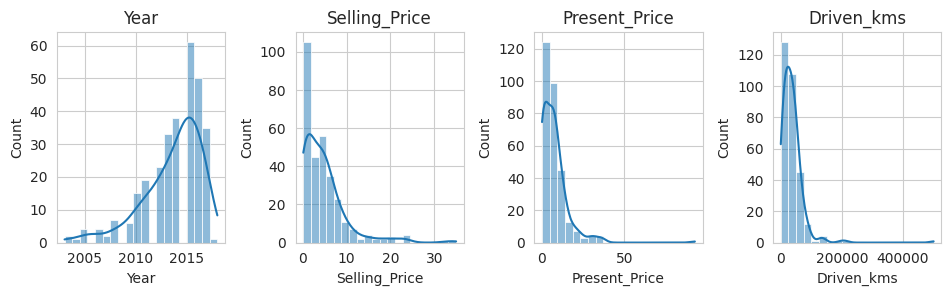

In [35]:
# Distribution of Numerical Features
numerical_features = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms']


plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=car_data[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()


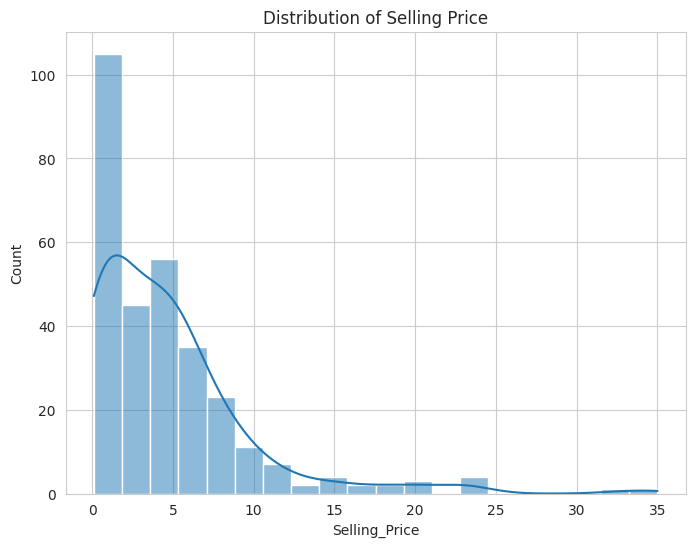

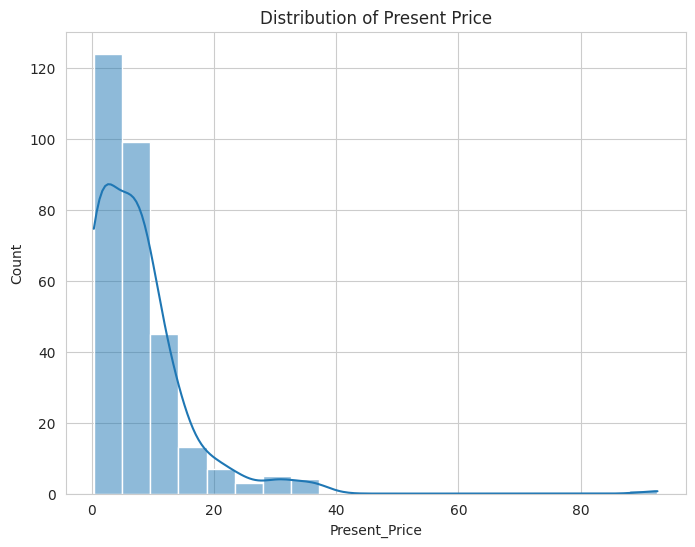

In [22]:
# Price Analysis
plt.figure(figsize=(8, 6))
sns.histplot(data=car_data['Selling_Price'], bins=20, kde=True) # Removed extra tab and 'Present_Price'
plt.title('Distribution of Selling Price') # Changed title to reflect the actual column
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=car_data['Present_Price'], bins=20, kde=True) # Created a separate plot for 'Present_Price'
plt.title('Distribution of Present Price')
plt.show()

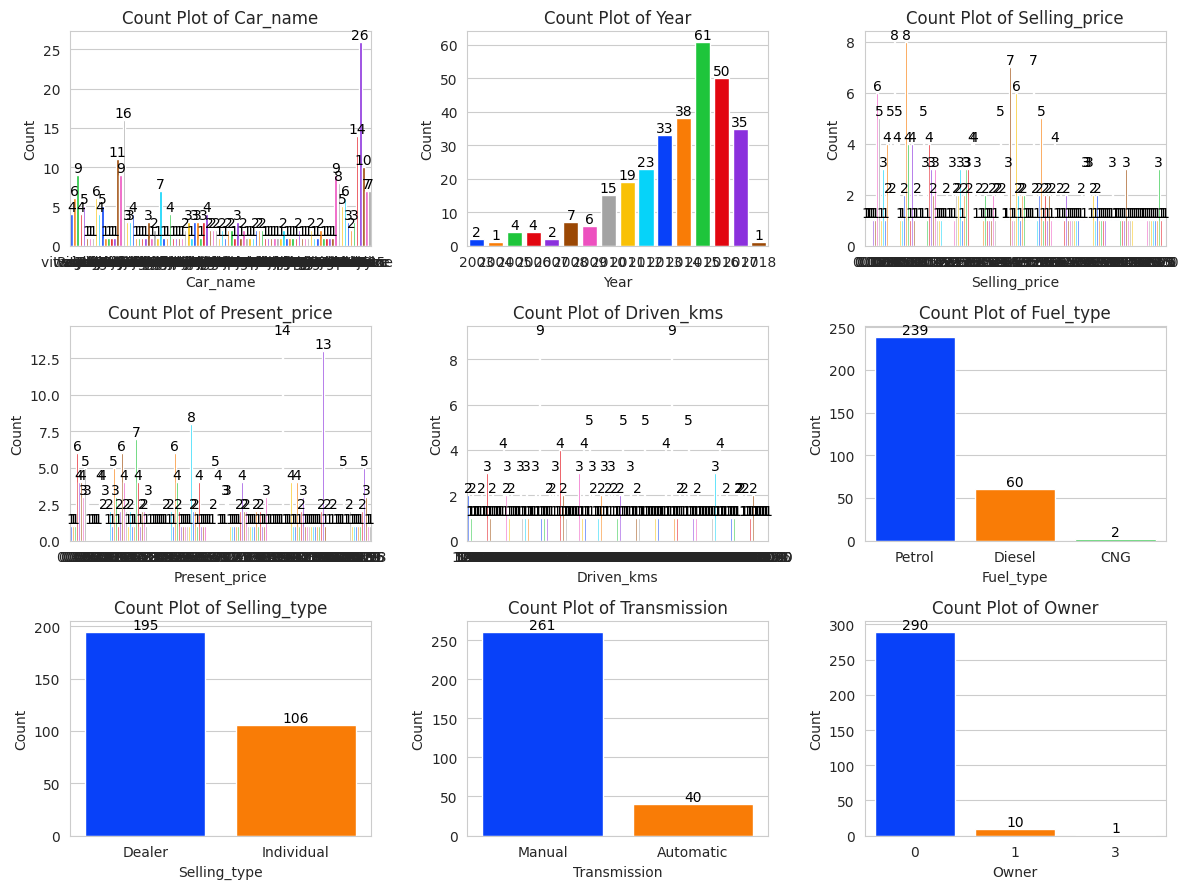

In [25]:
# Define the list of categorical columns to analyze
categorical_columns = ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'
]
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=car_data[column], data=car_data, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

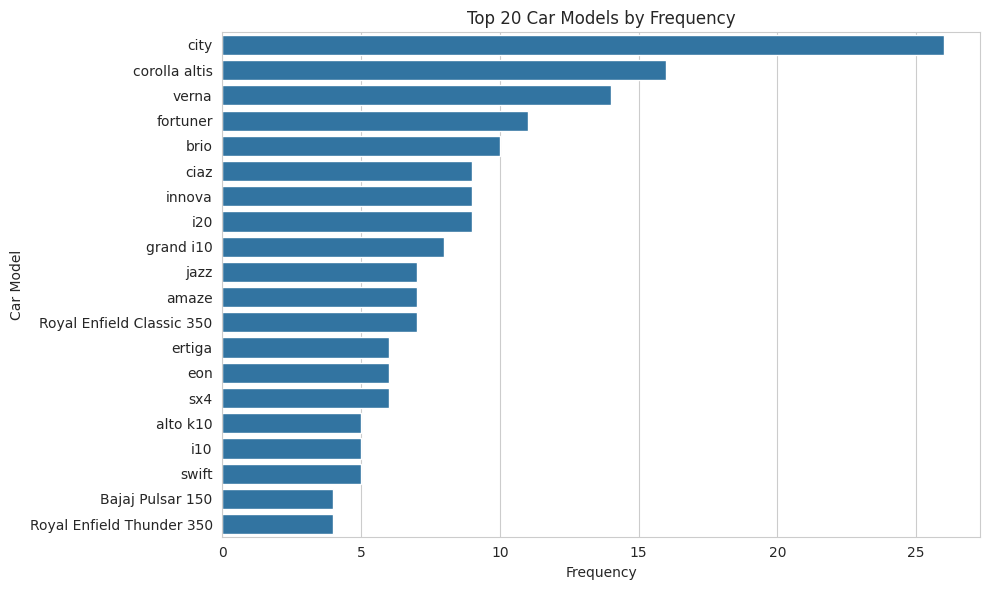

In [28]:
n = 20  # Number of top car models to plot
top_car_models = car_data['Car_Name'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

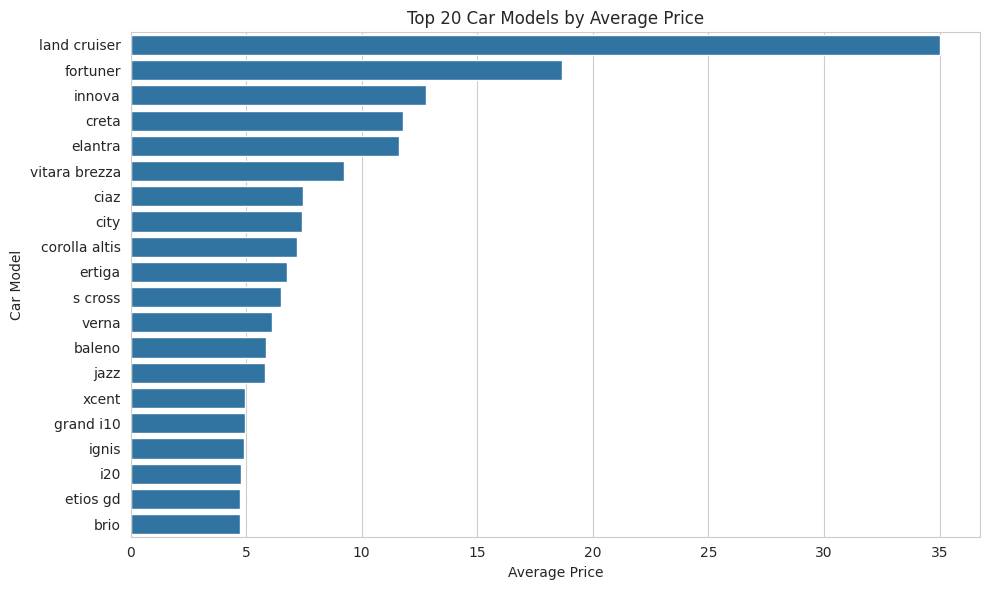

In [30]:
# Calculate average price for each car model
avg_prices_by_car = car_data.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

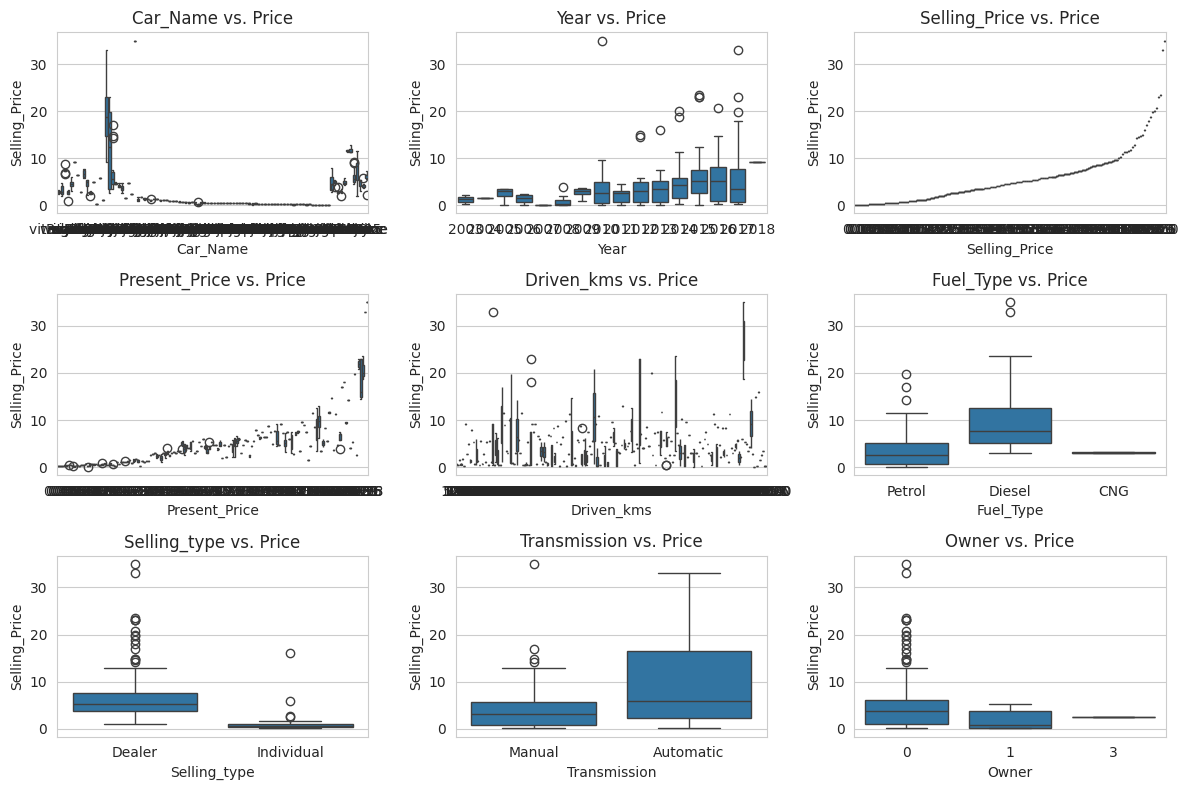

In [32]:
# Categorical Feature vs. Price
plt.figure(figsize=(12, 8))
for feature in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    sns.boxplot(data=car_data, x=feature, y='Selling_Price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

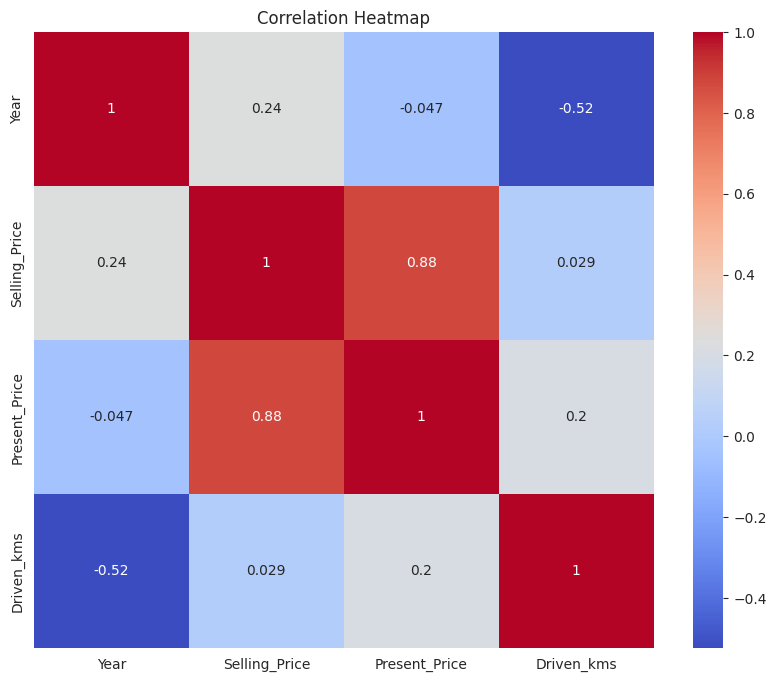

In [34]:
# Correlation Analysis
numerical_features = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms']

correlation_matrix = car_data[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# ***4) Data Pre-Processing***

In [45]:
# Define your categorical and numerical columns
categorical_columns = ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms']

# Encoding categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    car_data[column] = label_encoder.fit_transform(car_data[column])

# Feature engineering
# Creating new features if needed (example)
car_data['age_of_car'] = 2024 - car_data['Year']  # You can update the current year as necessary
car_data['price_ratio'] = car_data['Present_Price'] / car_data['Selling_Price']

# Feature scaling
scaler = StandardScaler()
car_data[numerical_columns] = scaler.fit_transform(car_data[numerical_columns])

# Show the first few rows of the transformed dataset
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,brand,model,age_of_car,price_ratio
0,90,0.128897,-0.172981,-0.262633,-0.240142,2,0,1,0,ritz,,2013,0.983051
1,93,-0.217514,0.268858,0.810582,0.617243,1,0,1,0,sx4,,2014,1.346154
2,68,1.168129,1.059518,0.856250,-1.290002,2,0,1,0,ciaz,,2010,0.955357
3,96,-0.910335,-0.335764,-0.468142,-1.429983,2,0,1,0,wagon,r,2016,0.942308
4,92,0.128897,0.222349,0.102717,0.599745,1,0,1,0,swift,,2013,0.973684


***5) Train the Model***

In [54]:
# Splitting the dataset
X = car_data.drop(['Selling_Price', 'Car_Name'], axis=1)  # Dropping 'Car_Name'
y = car_data['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for any remaining string columns in X_train
print(X_train.dtypes)

# If there are any object columns (likely string columns), identify and handle them
# For example, you might need to one-hot encode them:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align columns in X_train and X_test to ensure they have the same features
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

# Check and handle infinite values
X_train = X_train.replace([np.inf, -np.inf], np.nan) # Replace infinite values with NaN
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Impute missing values using SimpleImputer
from sklearn.impute import SimpleImputer  # Import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Use mean imputation
X_train = imputer.fit_transform(X_train)  # Fit and transform on training data
X_test = imputer.transform(X_test)  # Transform test data

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

Year             float64
Present_Price    float64
Driven_kms       float64
Fuel_Type          int64
Selling_type       int64
Transmission       int64
Owner              int64
brand             object
model             object
age_of_car         int64
price_ratio      float64
dtype: object


In [55]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: -2.4661816497762084e+16
Mean Squared Error: 2.4123520584582148e+16


In [56]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df


,Actual Value,Predicted Value,Difference
177,-1.289207,-1.686762e+08,1.686762e+08
289,1.524612,1.419922e+00,1.046905e-01
228,0.361877,4.863281e-01,-1.244509e-01
198,-1.498499,-3.384766e+00,1.886266e+00
60,0.989754,1.025391e+00,-3.563641e-02
9,1.106028,9.863281e-01,1.196996e-01
118,-0.824113,-7.910156e-01,-3.309710e-02
154,-1.149679,-7.178002e+05,7.177991e+05
164,-1.196188,-1.152344e+00,-4.384425e-02
33,0.733952,9.238281e-01,-1.898757e-01
